## Project 1 - Classification Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
data= pd.read_csv('weatherdata.csv')
data.shape

(3000, 24)

## Exploring the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
Date             3000 non-null object
Location         3000 non-null object
MinTemp          2994 non-null float64
MaxTemp          2999 non-null float64
Rainfall         2980 non-null float64
Evaporation      0 non-null float64
Sunshine         0 non-null float64
WindGustDir      2990 non-null object
WindGustSpeed    2990 non-null float64
WindDir9am       2486 non-null object
WindDir3pm       2961 non-null object
WindSpeed9am     2996 non-null float64
WindSpeed3pm     2993 non-null float64
Humidity9am      2996 non-null float64
Humidity3pm      2996 non-null float64
Pressure9am      3000 non-null float64
Pressure3pm      2996 non-null float64
Cloud9am         1272 non-null float64
Cloud3pm         1411 non-null float64
Temp9am          2996 non-null float64
Temp3pm          2996 non-null float64
RainToday        2980 non-null object
RISK_MM          3000 non-null float64
RainTomo

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,2994.000000,2999.000000,2980.000000,0.0,0.0,2990.000000,2996.000000,2993.000000,2996.000000,2996.000000,3000.000000,2996.000000,1272.000000,1411.000000,2996.000000,2996.000000,3000.000000
mean,9.549532,22.662221,1.932483,NaN,NaN,33.002676,8.238985,14.415302,74.017023,47.814085,1018.335833,1015.724332,6.389151,5.423813,14.383445,21.395360,1.920600
std,6.054214,7.793239,6.259577,NaN,NaN,13.348784,6.748694,7.179581,17.403415,19.824585,7.351716,7.101547,2.390706,2.825989,6.358004,7.521371,6.240495
min,-2.800000,6.800000,0.000000,NaN,NaN,9.000000,0.000000,0.000000,18.000000,7.000000,989.800000,982.900000,0.000000,1.000000,0.300000,6.400000,0.000000
25%,4.800000,15.900000,0.000000,NaN,NaN,24.000000,4.000000,9.000000,61.000000,33.000000,1013.400000,1010.700000,5.000000,2.000000,9.300000,15.000000,0.000000
50%,9.100000,22.000000,0.000000,NaN,NaN,31.000000,7.000000,13.000000,76.000000,47.000000,1018.400000,1015.600000,8.000000,7.000000,14.100000,20.600000,0.000000
75%,14.300000,28.900000,0.400000,NaN,NaN,41.000000,11.000000,19.000000,88.000000,60.000000,1023.225000,1020.500000,8.000000,8.000000,19.325000,27.200000,0.400000
max,28.300000,44.800000,104.200000,NaN,NaN,107.000000,37.000000,50.000000,100.000000,100.000000,1039.900000,1036.100000,8.000000,8.000000,34.500000,43.400000,104.200000


In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
2995,6/10/2017,Albury,1.9,16.7,0.0,NaN,NaN,NW,13.0,NE,...,58.0,1034.4,1031.3,NaN,NaN,7.1,16.0,No,0.0,No
2996,6/11/2017,Albury,1.4,16.6,0.0,NaN,NaN,ENE,13.0,NE,...,60.0,1031.1,1026.5,1.0,NaN,6.6,16.3,No,0.2,No
2997,6/12/2017,Albury,1.9,15.1,0.2,NaN,NaN,W,17.0,SSE,...,70.0,1029.1,1026.4,8.0,NaN,5.1,14.8,No,0.2,No
2998,6/13/2017,Albury,3.3,15.9,0.2,NaN,NaN,SE,17.0,NaN,...,67.0,1031.3,1029.8,1.0,NaN,6.6,15.4,No,0.2,No
2999,6/14/2017,Albury,1.6,15.3,0.2,NaN,NaN,SE,17.0,NaN,...,69.0,1032.0,1029.0,NaN,NaN,5.6,15.0,No,0.0,No


In [7]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

## Checking for missing values and imputing 

In [8]:
data.isnull().sum()

Date                0
Location            0
MinTemp             6
MaxTemp             1
Rainfall           20
Evaporation      3000
Sunshine         3000
WindGustDir        10
WindGustSpeed      10
WindDir9am        514
WindDir3pm         39
WindSpeed9am        4
WindSpeed3pm        7
Humidity9am         4
Humidity3pm         4
Pressure9am         0
Pressure3pm         4
Cloud9am         1728
Cloud3pm         1589
Temp9am             4
Temp3pm             4
RainToday          20
RISK_MM             0
RainTomorrow        0
dtype: int64

In [9]:
data.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"], axis = 1, inplace = True) 

In [10]:
data["MinTemp"].fillna(data["MinTemp"].mean(), inplace = True)
data["MaxTemp"].fillna(data["MaxTemp"].mean(), inplace = True)
data["Rainfall"].fillna(data["Rainfall"].mean(), inplace = True)
data["WindGustSpeed"].fillna(data["WindGustSpeed"].mean(), inplace = True)
data["WindSpeed9am"].fillna(data["WindSpeed9am"].mean(), inplace = True)
data["WindSpeed3pm"].fillna(data["WindSpeed3pm"].mean(), inplace = True)
data["Humidity9am"].fillna(data["Humidity9am"].mean(), inplace = True)
data["Humidity3pm"].fillna(data["Humidity3pm"].mean(), inplace = True)
data["Pressure3pm"].fillna(data["Pressure3pm"].mean(), inplace = True)
data["Temp9am"].fillna(data["Temp9am"].mean(), inplace = True)
data["Temp3pm"].fillna(data["Temp3pm"].mean(), inplace = True)
data["WindGustDir"].fillna("NW", inplace = True)
data["WindDir9am"].fillna("NWW", inplace = True)
data["WindDir3pm"].fillna("SE", inplace = True)
data["RainToday"].fillna("Yes", inplace = True)

In [11]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [12]:
data.shape

(3000, 20)

## Explanatory Data Analysis

In [13]:
import seaborn as sns
sns.set()

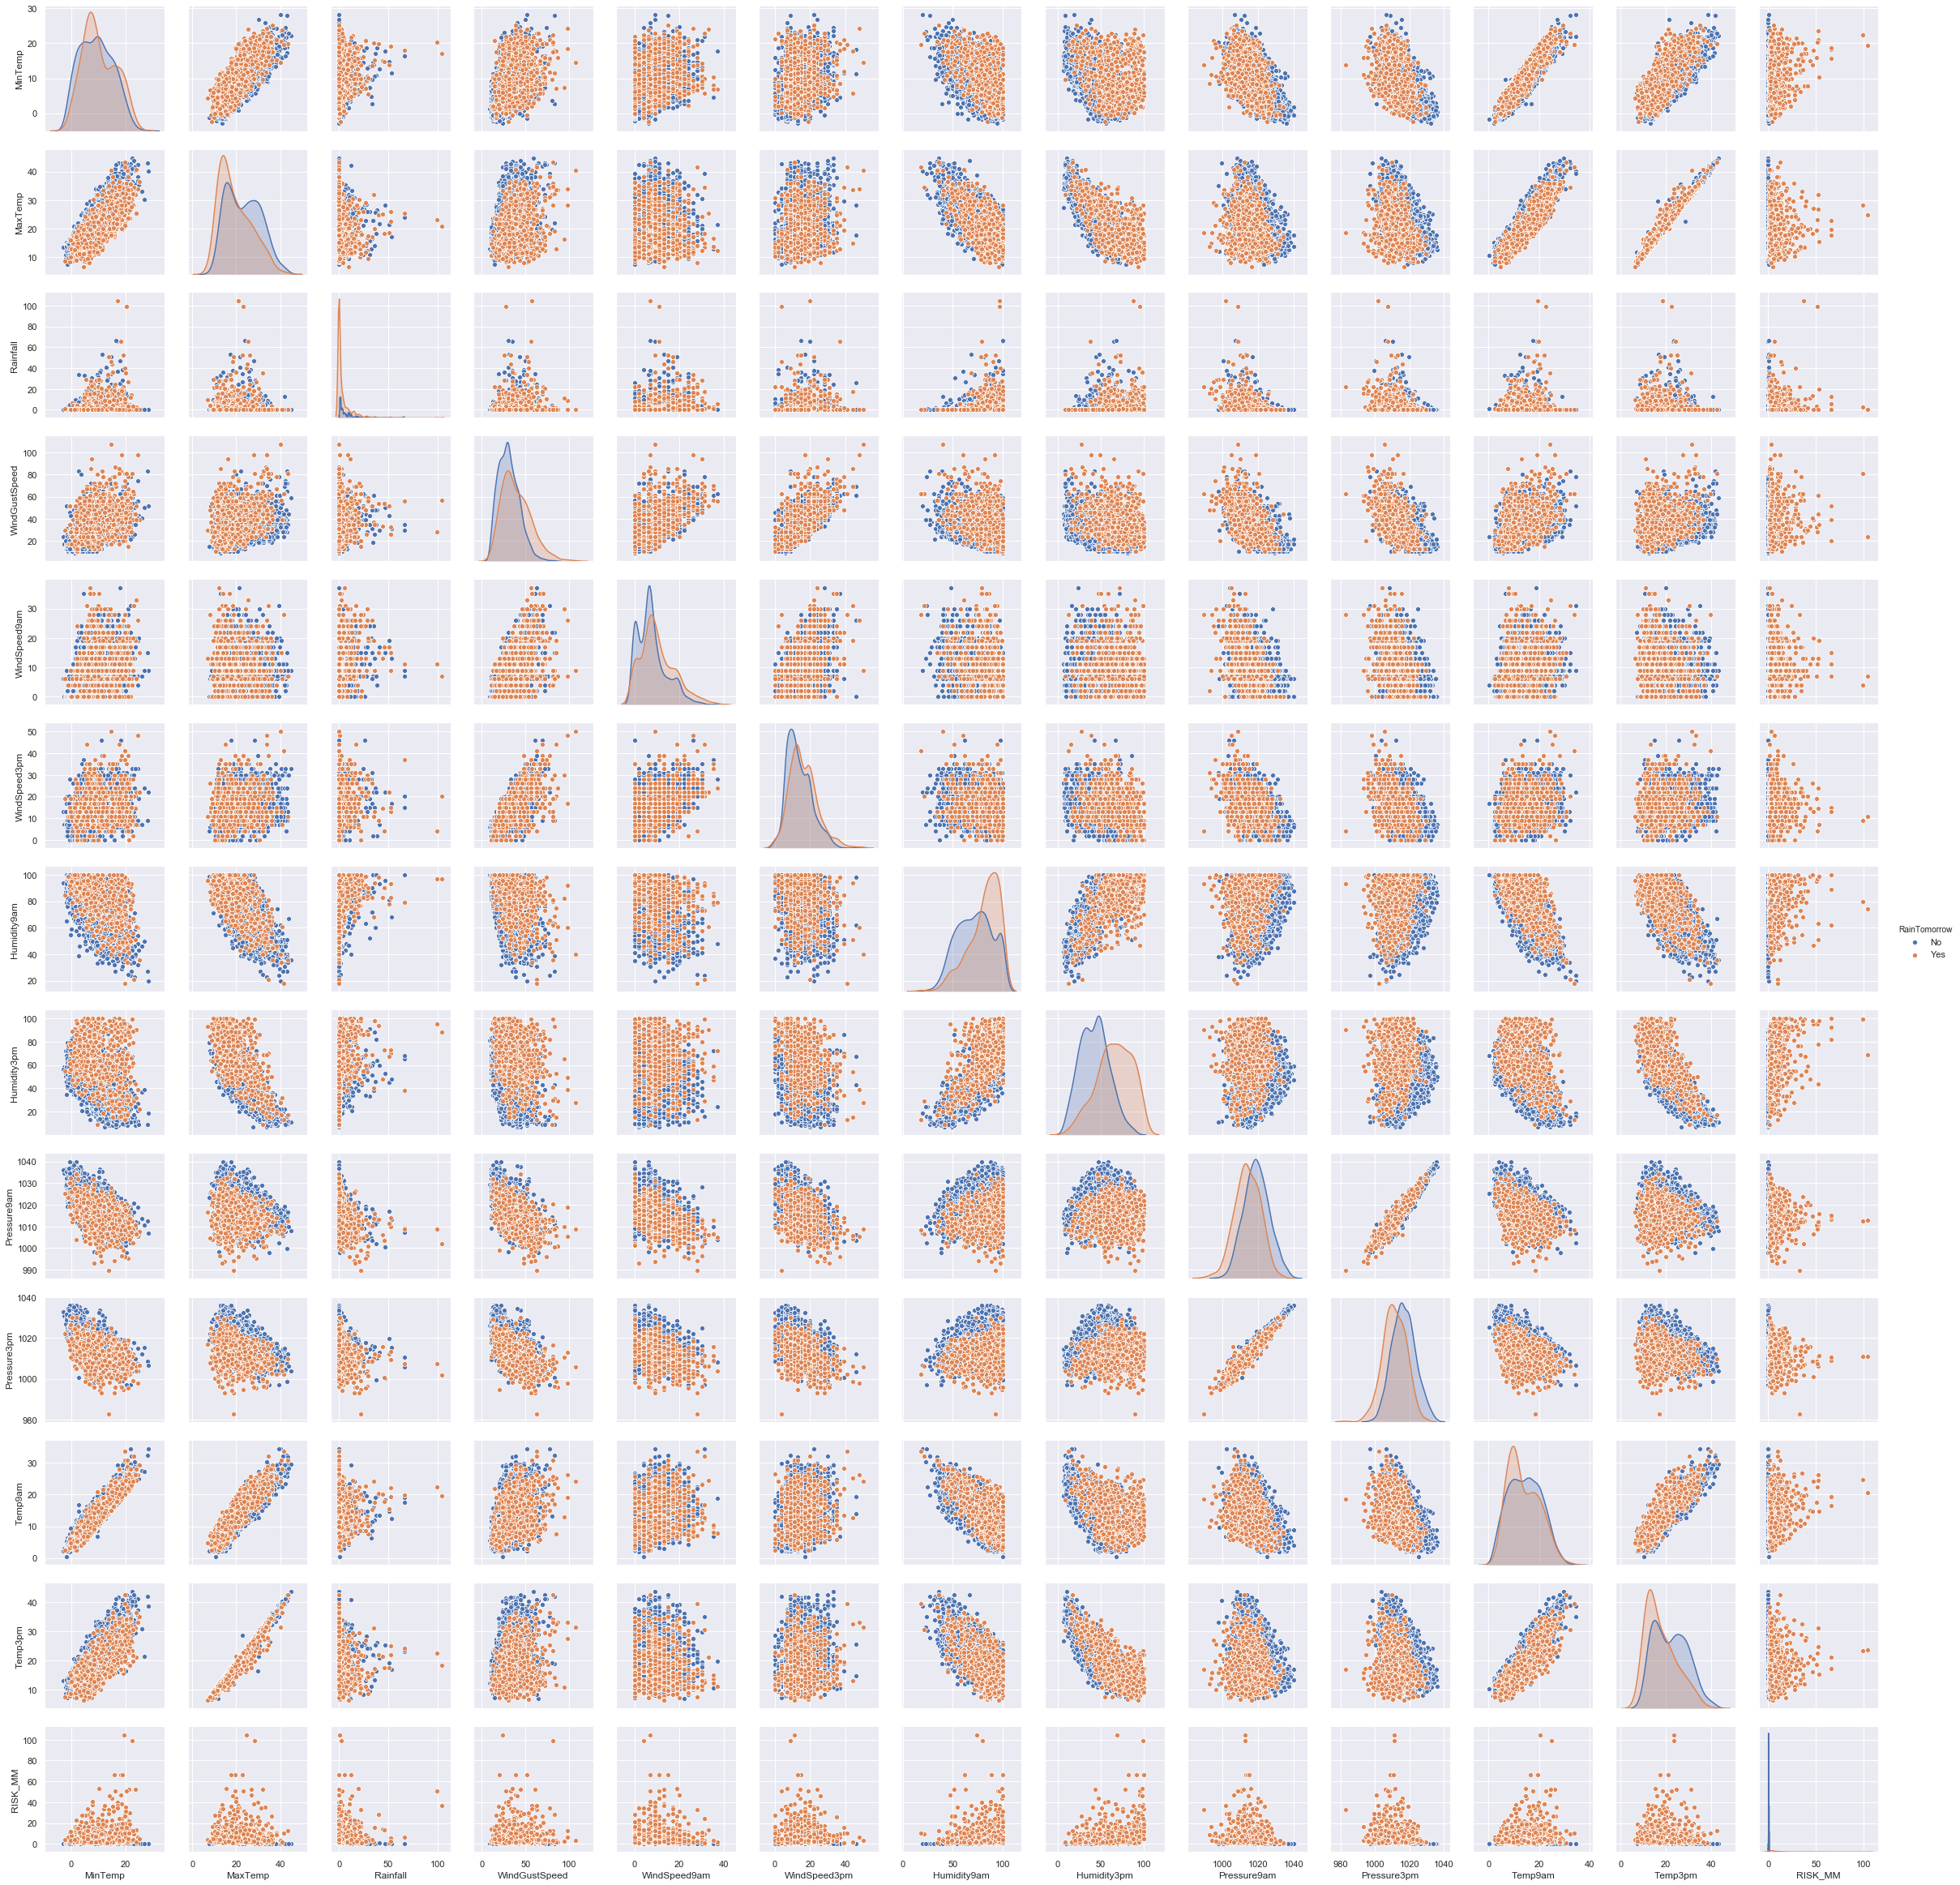

In [14]:
sns.pairplot(data, hue='RainTomorrow');

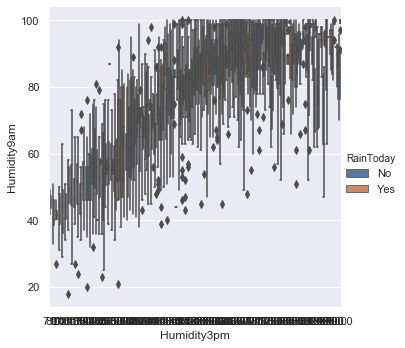

In [15]:
g = sns.catplot("Humidity3pm", "Humidity9am", "RainToday", data=data, kind = 'box')
g.set_axis_labels("Humidity3pm", "Humidity9am");

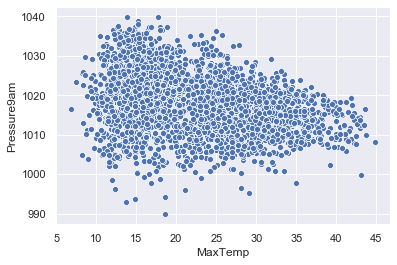

In [16]:
sns.scatterplot(x='MaxTemp',y='Pressure9am',data=data)

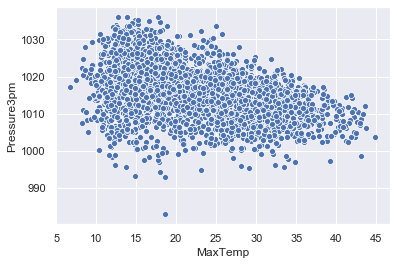

In [17]:
sns.scatterplot(x='MaxTemp',y='Pressure3pm',data=data)

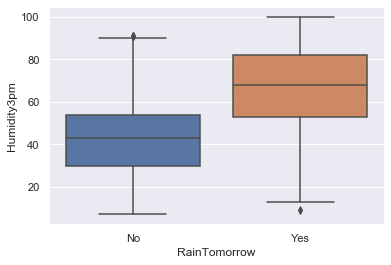

In [18]:
sns.boxplot(x='RainTomorrow',y='Humidity3pm',data=data)

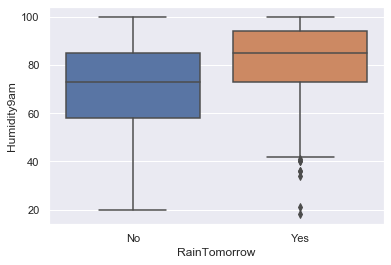

In [19]:
sns.boxplot(x='RainTomorrow',y='Humidity9am',data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025083AE17B8>,
      dtype=object)

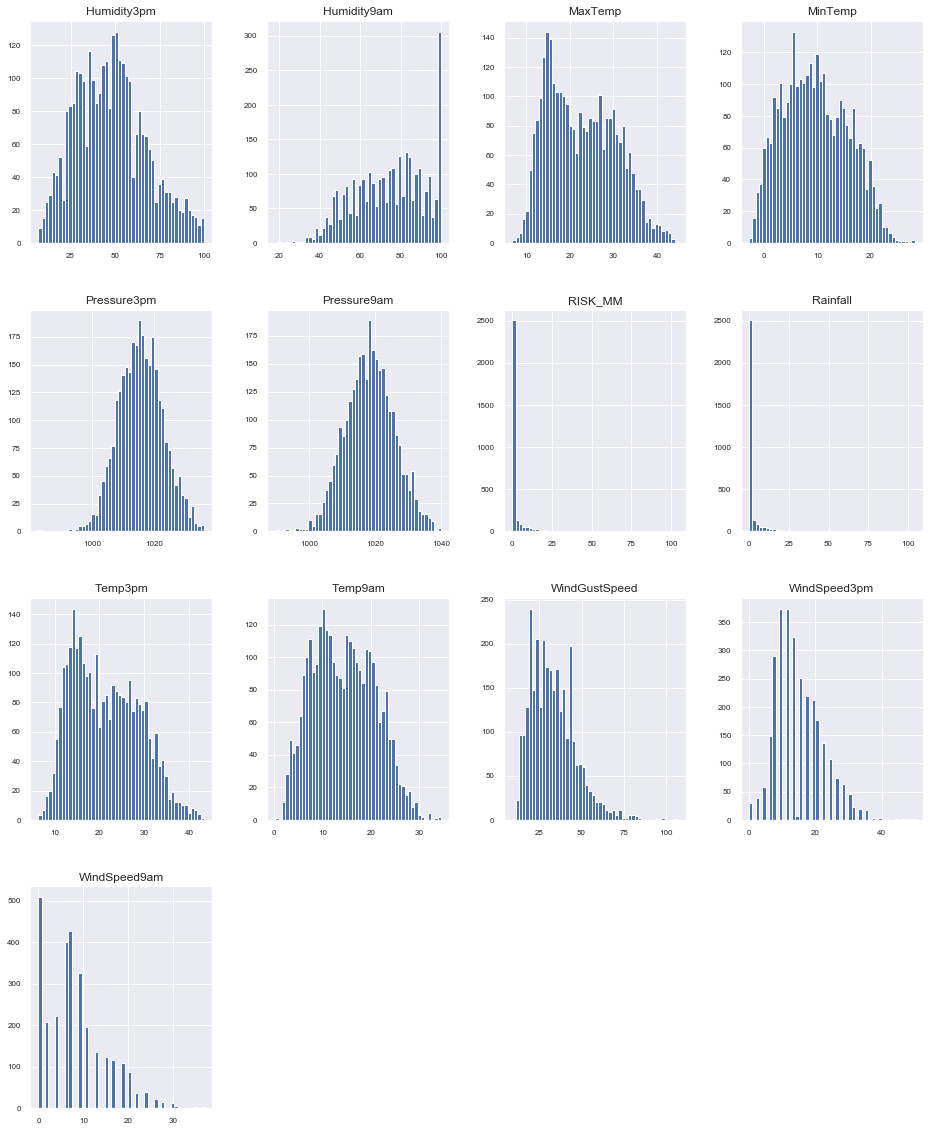

In [20]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Checking for correlation 

In [21]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

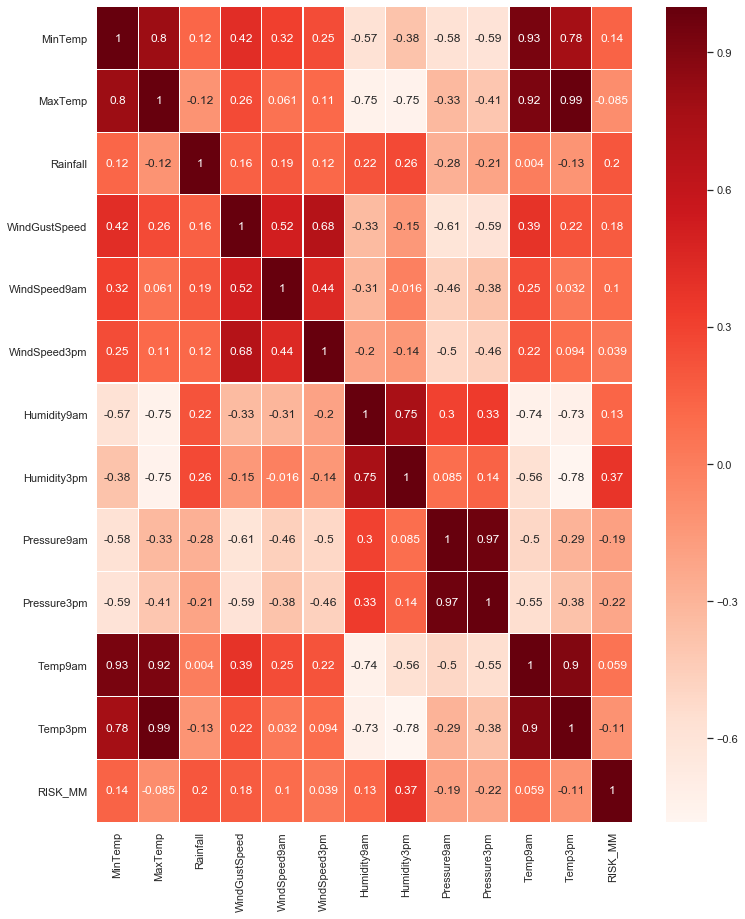

In [22]:
dat_cor =data.corr()

import seaborn as sns
fig, ax = plt.subplots(figsize=(12,15)) 
sns.heatmap(dat_cor,annot=True,cmap=plt.cm.Reds,linewidths=0.1)

## Min Max Scaling

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["loc_encoded"]=le.fit_transform(data["Location"])
data["rain_encoded"]=le.fit_transform(data["RainToday"])
data["WindGust_encoded"]=le.fit_transform(data["WindGustDir"])
data["Dir9am_encoded"]=le.fit_transform(data["WindDir9am"])
data["Dir3pm_encoded"]=le.fit_transform(data["WindDir3pm"])
data["RainTom"]=le.fit_transform(data["RainTomorrow"])

In [24]:
data['loc_encoded'] = data['loc_encoded'].astype(float)
data['rain_encoded'] = data['rain_encoded'].astype(float)
data['WindGust_encoded'] = data['WindGust_encoded'].astype(float)
data['Dir9am_encoded'] = data['Dir9am_encoded'].astype(float)
data['Dir3pm_encoded'] = data['Dir3pm_encoded'].astype(float)

data.drop(['Date','Location','RainToday','RainTomorrow','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [25]:
X = data.drop('RainTom',axis=1).values
y = data.RainTom.values
X

array([[13.4, 22.9,  0.6, ..., 13. , 14. , 14. ],
       [ 7.4, 25.1,  0. , ..., 14. ,  6. , 15. ],
       [12.9, 25.7,  0. , ..., 15. , 14. , 15. ],
       ...,
       [ 1.9, 15.1,  0.2, ..., 13. , 11. , 13. ],
       [ 3.3, 15.9,  0.2, ...,  9. ,  8. ,  2. ],
       [ 1.6, 15.3,  0.2, ...,  9. ,  8. ,  9. ]])

In [26]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
X_train_org

array([[ 6.1, 20.4,  0. , ...,  4. , 10. ,  5. ],
       [12.4, 29.4,  0. , ..., 10. , 11. ,  9. ],
       [11.2, 24.3,  0. , ..., 14. , 14. , 14. ],
       ...,
       [10.3, 16.7,  0.8, ..., 13. , 15. , 13. ],
       [13.6, 20.2,  0.2, ..., 13. ,  7. ,  7. ],
       [ 8.3, 13.6, 10.8, ...,  6. , 14. ,  7. ]])

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [28]:
X_train_org.shape

(2400, 18)

In [29]:
X_test_org.shape

(600, 18)

In [30]:
y_train.shape

(2400,)

In [31]:
y_test.shape

(600,)

## KNN Classification

In [32]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

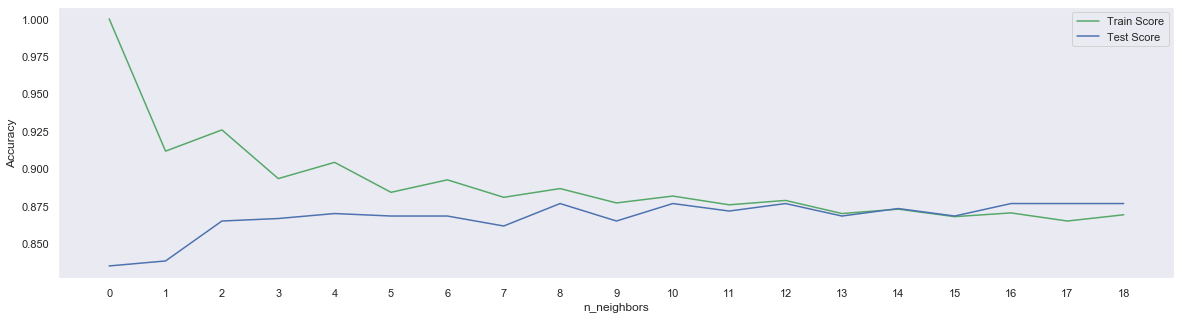

In [33]:
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

In [34]:
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8867
Test score: 0.8767


In [35]:
from sklearn.model_selection import GridSearchCV

grid_parms_knn = {'n_neighbors':[1,5,10,15,20,25]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(KNeighborsClassifier(), grid_parms_knn,verbose = 1,cv = 3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.86


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.9s finished


In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10)
print("Cross-validation scores:{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores:[0.87916667 0.86666667 0.90416667 0.8625     0.85       0.875
 0.8625     0.85833333 0.85416667 0.875     ]
Mean score: 0.86875


In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[470  68]
 [  9  53]]
0.5792349726775956


### KNN Classification Summary

#### Train Score: 0.8758

#### Test Score: 0.8747

#### Mean Cross - Validation Score: 0.8516

#### Best Parameters: {'n_neighbors': 25}

#### F1 Score: 0.5503

## Logistic Regression

In [38]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [39]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


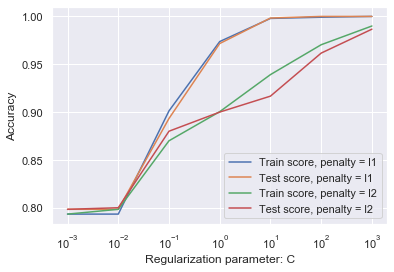

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [43]:
data.head(1)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,loc_encoded,rain_encoded,WindGust_encoded,Dir9am_encoded,Dir3pm_encoded,RainTom
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,0.0,13.0,14.0,14.0,0


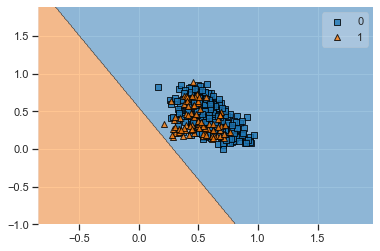

In [44]:
%matplotlib inline

import mlxtend
from mlxtend.plotting import plot_decision_regions

X_b = X_train[100:500, [8,10]]
y_b = y_train[100:500]
y.astype(np.integer)

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = lreg)

In [45]:
log_l2 = LogisticRegression(penalty = 'l2', C = 1)
#log_l1.fit(X_train, y_train)
log_l2.fit(X_train, y_train)
print("Train score: %.4f"%log_l2.score(X_train, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print("Test score: %.4f"%log_l2.score(X_test, y_test))

Train score: 0.9004
Test score: 0.9000


In [46]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l1.fit(X_train, y_train)
#log_l2.fit(X_train, y_train)
print("Train score: %.4f"%log_l1.score(X_train, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print("Test score: %.4f"%log_l1.score(X_test, y_test))

Train score: 0.9738
Test score: 0.9717


In [47]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [48]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 1.00


In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:{}".format(cross_val_score(log_l1 , X_train, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train, y_train, cv=kfold)
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores:[0.975  0.97   0.97   0.9725 0.9625 0.9575]
Mean score: 0.9679166666666669


In [50]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l1.fit(X_train, y_train)
ypred = log_l1.predict(X_test)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.9251101321585904
[[478  16]
 [  1 105]]


### Logistic Regression Summary

#### Train Score: 0.9682

#### Test Score: 0.9733

#### Mean Cross - Validation Score: 0.9651

#### Best Parameters: {'C': 1, 'penaty': 'l1'}

#### F1 Score: 0.9312

## Linear Support Vector Machine

In [51]:
from sklearn.svm import LinearSVC,SVC
crange = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

test_score=[]
train_score=[]

for c in crange:
    lsvm = LinearSVC(C = c)
    lsvm.fit(X_train,y_train)
    train_score.append(lsvm.score(X_train,y_train))
    test_score.append(lsvm.score(X_test,y_test))

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


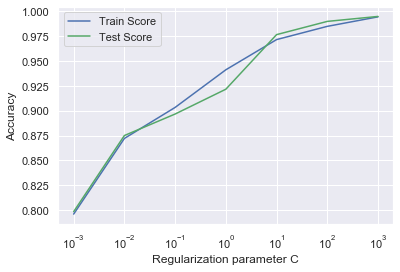

In [52]:
plt.xscale('log')
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.plot(crange,train_score,label="Train Score", c="b")
plt.plot(crange,test_score,label="Test Score", c="g")
plt.legend()

In [53]:
lin_svm = LinearSVC(C = 10)
lin_svm.fit(X_train, y_train)

print('Train score: {:.4f}'.format(lin_svm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lin_svm.score(X_test, y_test)))

Train score: 0.9717
Test score: 0.9767


C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [54]:
from sklearn.model_selection import cross_val_score
cvscore=cross_val_score(lin_svm,X_train,y_train,cv=10)
pd.DataFrame({"The CrossValScores are": cvscore})

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

,The CrossValScores are
0,0.979253
1,0.975104
2,0.975104
3,0.966805
4,0.966667
5,0.987500
6,0.941423
7,0.962343
8,0.966527
9,0.974895


In [55]:
print("Mean cross-validation score: {:.4f}".format(cvscore.mean()))

Mean cross-validation score: 0.9696


In [56]:
from sklearn.model_selection import GridSearchCV
param_linearSVM = { 'max_iter' : range(1,200),'C' : [ 0.01, 0.1, 1, 10, 100, 1000]}

CV_linearSVM = GridSearchCV(estimator = lin_svm, param_grid = param_linearSVM ,cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
GS_results_linearSVM = CV_linearSVM.fit(X_train, y_train)

best_parameters_linearSVM = CV_linearSVM.best_params_
print(best_parameters_linearSVM)

Fitting 5 folds for each of 1194 candidates, totalling 5970 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 4352 tasks      | elapsed:   12.0s


{'C': 1000, 'max_iter': 125}


[Parallel(n_jobs=-1)]: Done 5970 out of 5970 | elapsed:   20.7s finished
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [57]:
lin_SVM = LinearSVC(C = 10 ,max_iter = 152)
lin_SVM.fit(X_train, y_train)
y_pred = lin_SVM.predict(X_test)
 
print('Train score: {:.4f}'.format(lin_SVM.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lin_SVM.score(X_test, y_test)))

Train score: 0.9700
Test score: 0.9750


C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

lin_svm = LinearSVC(C = 10)
lin_svm.fit(X_train, y_train)
ypred = lin_svm.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
f = f1_score(y_pred,y_test)
print(cm)
print(f)

[[479  15]
 [  0 106]]
0.9339207048458149


C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Linear Support Vector Machine Summary

#### Train Score: 0.9712

#### Test Score: 0.9767

#### Mean Cross - Validation Score: 0.9696

#### Best Parameters: {'C': 100, 'max_iter': 177}

#### F1 Score: 0.9386

## Kernelized Support Vector Machine - linear


In [59]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [60]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [61]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'linear', C = C)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C))

In [62]:
print(train)
print(test)
print(index)

[0.7933333333333333, 0.7933333333333333, 0.88625, 0.9225, 0.9566666666666667, 0.9833333333333333]
[0.7983333333333333, 0.7983333333333333, 0.885, 0.905, 0.9566666666666667, 0.9866666666666667]
[0.001, 0.01, 0.1, 1, 10, 100]


In [63]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'linear')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [64]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.98


In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'linear',C = 100)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print("Cross-validation scores: {}",format(scores))
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores: {} [0.995  0.975  0.9825 0.9825 0.975  0.985 ]
Mean score: 0.9825


In [66]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'linear', C = 1 )
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[471  49]
 [  8  72]]
0.7164179104477612


### Kernelized Support Vector Machine - linear Summary

#### Train Score: 0.9148

#### Test Score: 0.9261

#### Mean Cross - Validation Score: 0.9967

#### Best Parameters: {'C': 100}

#### F1 Score: 0.8022

## Kernelized Support Vector Machine - rbf

In [67]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [68]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [ 0.01,0.1, 1, 10, 100]:
    for gamma in [ 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C,gamma))

In [69]:
print(train)
print(test)
print(index)

[0.7946666666666666, 0.7946666666666666, 0.7946666666666666, 0.7946666666666666, 0.7946666666666666, 0.7946666666666666, 0.8093333333333333, 0.8671111111111112, 0.7946666666666666, 0.7946666666666666, 0.8177777777777778, 0.8955555555555555, 0.9208888888888889, 0.9693333333333334, 1.0, 0.896, 0.9364444444444444, 0.9675555555555555, 0.9995555555555555, 1.0, 0.9368888888888889, 0.9715555555555555, 0.9973333333333333, 1.0, 1.0]
[0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.8053333333333333, 0.876, 0.7933333333333333, 0.7933333333333333, 0.8173333333333334, 0.8866666666666667, 0.9, 0.8346666666666667, 0.7933333333333333, 0.888, 0.9093333333333333, 0.9213333333333333, 0.8506666666666667, 0.7933333333333333, 0.9106666666666666, 0.9573333333333334, 0.9533333333333334, 0.8506666666666667, 0.7933333333333333]
[(0.01, 0.01), (0.01, 0.1), (0.01, 1), (0.01, 10), (0.01, 100), (0.1, 0.01), (0.1, 0.1), (0.1, 1), (0.1, 10), (0

In [70]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'rbf')

parameters = {'C': [0.01, 0.1, 1, 10, 100], 'gamma' : [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [71]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation score: 0.83


In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc1 = SVC(kernel = 'rbf',C = 10,gamma = 0.01)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train, y_train, cv=kfold)
print("Cross-validation scores: ",format(scores))
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores:  [0.88533333 0.90133333 0.89866667 0.90133333 0.888      0.896     ]
Mean score: 0.8951111111111111


In [73]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'rbf', C = 10, gamma = 0.01)
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)

[[580  69]
 [ 15  86]]
0.671875


### Kernelized Support Vector Machine - rbf Summary

#### Train Score: 0.9151

#### Test Score: 0.9064

#### Mean Cross - Validation Score: 0.9168

#### Best Parameters: {'C': 10, 'gamma': 0.01}

#### F1 Score: 0.8362

## Kernelized Support Vector Machine - poly

In [74]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [75]:
from sklearn.svm import SVC

train = []
test = []
index = []

for gamma in [0.01,0.1, 1, 10, 100]:
    #create the model
    svc = SVC(kernel = 'poly', degree = 2, gamma = gamma)
    
    #train the model
    svc.fit(X_train, y_train)
    
    #evaluate the model
    train.append(svc.score(X_train, y_train))
    test.append(svc.score(X_test, y_test))
    index.append((gamma))

In [76]:
print(train)
print(test)
print(index)

[0.7946666666666666, 0.8688888888888889, 0.9488888888888889, 0.9964444444444445, 1.0]
[0.7933333333333333, 0.8693333333333333, 0.932, 0.98, 0.984]
[0.01, 0.1, 1, 10, 100]


In [77]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'poly')

parameters = {'C': [0.1, 1, 10, 100], 'gamma' : [0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [78]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'gamma': 100}
Best cross-validation score: 1.00


In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc1 = SVC(kernel = 'poly',C = 100,gamma = 0.01)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train, y_train, cv=kfold)
print("Cross-validation scores: ",format(scores))
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores:  [0.78933333 0.784      0.81333333 0.792      0.816      0.77333333]
Mean score: 0.7946666666666666


In [80]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'poly', C = 100, gamma = 0.01)
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)

[[595 155]
 [  0   0]]
0.0


C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


### Kernelized Support Vector Machine - poly Summary

#### Train Score: 0.8642

#### Test Score: 0.8752

#### Mean Cross - Validation Score: 0.9962

#### Best Parameters: {'C': 0.1, 'gamma': 10}

#### F1 Score: 0.9805

## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#X = d.drop('RainTom',axis=1).values
#y = d.RainTom.values
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


dtree = DecisionTreeClassifier(criterion='entropy',random_state=0)

dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [82]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


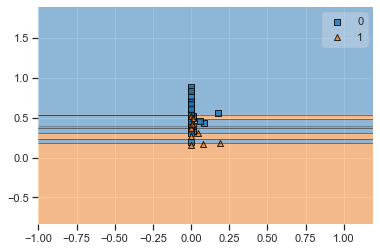

In [83]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:50,[2,9]]
y_b = y_train[:50]

dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = dtree)

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth=11, random_state=0)
kfold = KFold(n_splits=6)
print("Cross-validation scores: {}".format(cross_val_score(dtree , X_train, y_train, cv=kfold)))
scores = cross_val_score(dtree , X_train, y_train, cv=kfold)
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores: [1. 1. 1. 1. 1. 1.]
Mean score: 1.0


In [85]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=11, random_state=0)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[595   0]
 [  0 155]]
1.0


### Decision Tree Summary

#### Train Score: 1.0

#### Test Score: 1.0

#### Mean Cross - Validation Score: 1.0

#### F1 Score: 1.0

## NOTE - Since the dataset is biased towards one of the values in the target variable, we are getting train, test, mean cross - validation and F1 score as 1.0

## Conclusion

### Considering the F1 Scores, we conclude that Decision Tree is the best model for prediction.

### But if we ignore Decision Tree due to its biased problem, the next best model is Kernelized Support Vector Machine - poly for prediction.

### All this is supported by the confusion matrix of the models.